# Pymaceuticals Inc.
---

### Analysis


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
mouse_df = pd.read_csv(mouse_metadata_path)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results_path = "data/Study_results.csv"
results_df = pd.read_csv(study_results_path)
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
results_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
mouse_df["Mouse ID"].count


<bound method Series.count of 0      k403
1      s185
2      x401
3      m601
4      g791
       ... 
244    z314
245    z435
246    z581
247    z795
248    z969
Name: Mouse ID, Length: 249, dtype: object>

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = results_df[results_df.duplicated()] 
  
print("Redundant Rows :") 
duplicates

Redundant Rows :


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.0,0


In [7]:
redundant = mouse_df[mouse_df["Mouse ID"] == "g989"]
   
redundant

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,Propriva,Female,21,26


In [8]:
g989_df = results_df[results_df["Mouse ID"] == "g989"]


g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [9]:
cleanresults_df = results_df.sort_values('Timepoint', ascending=False)
cleanedresults_df = cleanresults_df.drop_duplicates(subset='Mouse ID', keep='first')
cleanedresults_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,b879,45,72.555239,2
1795,s508,45,30.276232,0
1797,y793,45,31.896238,2
1798,c766,45,69.823146,4
1799,z578,45,30.638696,0
...,...,...,...,...
194,b447,0,45.000000,0
222,t573,0,45.000000,0
155,l872,0,45.000000,0
135,d133,0,45.000000,0


In [10]:
mouse_df.count

<bound method DataFrame.count of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]>

In [11]:
RCT_df= pd.merge(mouse_df, cleanedresults_df, on ="Mouse ID", how = "left")
RCT_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.



In [13]:
# Checking the number of mice in the clean DataFrame.

RCT_df.count

<bound method DataFrame.count of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
4       g791     Ramicane    Male          11          16         45   
..       ...          ...     ...         ...         ...        ...   
244     z314     Stelasyn  Female          21          28          5   
245     z435     Propriva  Female          12          26         10   
246     z581    Infubinol  Female          24          25         45   
247     z795     Naftisol  Female          13          29         45   
248     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [15]:
from scipy.stats import sem

In [16]:
drugs=RCT_df.groupby(['Drug Regimen'])

drugtrial_df =drugs.mean()
drugtrial_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,14.04,20.12,41.0,36.667568,1.28
Ceftamin,12.80,27.40,30.6,57.753977,1.72
Infubinol,16.40,27.32,30.6,58.178246,1.60
Ketapril,14.72,28.08,32.6,62.806191,1.92
Naftisol,12.24,27.24,32.2,61.205757,2.00


In [17]:
drugsummary_df = drugtrial_df.drop(['Age_months','Weight (g)','Timepoint','Metastatic Sites'], axis = 1) 
drugsummary_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,36.667568
Ceftamin,57.753977
Infubinol,58.178246
Ketapril,62.806191
Naftisol,61.205757
Placebo,60.508414
Propriva,56.736964
Ramicane,36.191390
Stelasyn,61.001707


In [18]:
drugsummary_df["Median Tumor Volume"] = RCT_df["Tumor Volume (mm3)"].median()
drugsummary_df

,Tumor Volume (mm3),Median Tumor Volume
Drug Regimen,,
Capomulin,36.667568,55.84141
Ceftamin,57.753977,55.84141
Infubinol,58.178246,55.84141
Ketapril,62.806191,55.84141
Naftisol,61.205757,55.84141
Placebo,60.508414,55.84141
Propriva,56.736964,55.84141
Ramicane,36.191390,55.84141
Stelasyn,61.001707,55.84141


In [19]:
drugsummary_df["Tumor Volume Variance"] = RCT_df["Tumor Volume (mm3)"].var()
drugsummary_df

,Tumor Volume (mm3),Median Tumor Volume,Tumor Volume Variance
Drug Regimen,,,
Capomulin,36.667568,55.84141,160.151054
Ceftamin,57.753977,55.84141,160.151054
Infubinol,58.178246,55.84141,160.151054
Ketapril,62.806191,55.84141,160.151054
Naftisol,61.205757,55.84141,160.151054
Placebo,60.508414,55.84141,160.151054
Propriva,56.736964,55.84141,160.151054
Ramicane,36.191390,55.84141,160.151054
Stelasyn,61.001707,55.84141,160.151054


In [20]:
drugsummary_df["Tumor Volume Std. Dev."] = RCT_df["Tumor Volume (mm3)"].std()
drugsummary_df

,Tumor Volume (mm3),Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.
Drug Regimen,,,,
Capomulin,36.667568,55.84141,160.151054,12.65508
Ceftamin,57.753977,55.84141,160.151054,12.65508
Infubinol,58.178246,55.84141,160.151054,12.65508
Ketapril,62.806191,55.84141,160.151054,12.65508
Naftisol,61.205757,55.84141,160.151054,12.65508
Placebo,60.508414,55.84141,160.151054,12.65508
Propriva,56.736964,55.84141,160.151054,12.65508
Ramicane,36.191390,55.84141,160.151054,12.65508
Stelasyn,61.001707,55.84141,160.151054,12.65508


In [21]:
drugsummary_df["Tumor Volume Std.Error"] = RCT_df["Tumor Volume (mm3)"].sem()
drugsummary_df

,Tumor Volume (mm3),Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Error
Drug Regimen,,,,,
Capomulin,36.667568,55.84141,160.151054,12.65508,0.801983
Ceftamin,57.753977,55.84141,160.151054,12.65508,0.801983
Infubinol,58.178246,55.84141,160.151054,12.65508,0.801983
Ketapril,62.806191,55.84141,160.151054,12.65508,0.801983
Naftisol,61.205757,55.84141,160.151054,12.65508,0.801983
Placebo,60.508414,55.84141,160.151054,12.65508,0.801983
Propriva,56.736964,55.84141,160.151054,12.65508,0.801983
Ramicane,36.191390,55.84141,160.151054,12.65508,0.801983
Stelasyn,61.001707,55.84141,160.151054,12.65508,0.801983


In [22]:
summary_df = drugsummary_df.rename(columns={"Tumor Volume (mm3)":"Mean", "Median Tumor Volume":"Median","Tumor Volume Variance":"Var","Tumor Volume Std. Dev.":"Std. Dev.", "Tumor Volume Std.Error": "SEM"})
summary_df

,Mean,Median,Var,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,36.667568,55.84141,160.151054,12.65508,0.801983
Ceftamin,57.753977,55.84141,160.151054,12.65508,0.801983
Infubinol,58.178246,55.84141,160.151054,12.65508,0.801983
Ketapril,62.806191,55.84141,160.151054,12.65508,0.801983
Naftisol,61.205757,55.84141,160.151054,12.65508,0.801983
Placebo,60.508414,55.84141,160.151054,12.65508,0.801983
Propriva,56.736964,55.84141,160.151054,12.65508,0.801983
Ramicane,36.191390,55.84141,160.151054,12.65508,0.801983
Stelasyn,61.001707,55.84141,160.151054,12.65508,0.801983


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line



In [24]:
aggregate_df = RCT_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
aggregate_df

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

RCT_df.tail(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
229,x264,Naftisol,Female,21,27,40,63.283288,4
230,x336,Naftisol,Female,4,29,0,45.000000,0
231,x402,Stelasyn,Male,21,28,45,61.619606,3
232,x581,Ceftamin,Female,19,28,45,64.634949,3
233,x613,Zoniferol,Female,2,29,15,48.077646,0
234,x773,Placebo,Female,21,30,45,58.634971,4
235,x822,Ceftamin,Male,3,29,45,61.386660,3
236,x930,Naftisol,Male,13,26,25,53.726101,0
237,y163,Infubinol,Female,17,27,45,67.685569,3
238,y260,Ketapril,Female,7,25,45,62.909441,4


In [26]:
drugs=RCT_df.groupby(['Drug Regimen'])

micecount_df =drugs["Mouse ID"].count()
micecount_df.head

<bound method NDFrame.head of Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64>

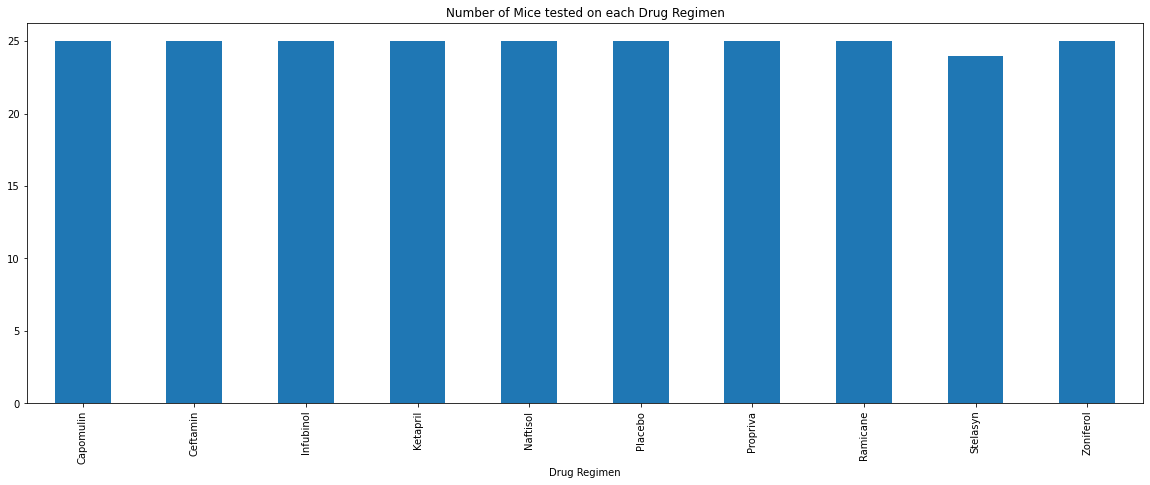

<Figure size 432x288 with 0 Axes>

In [27]:
micecount_df.plot(kind="bar", figsize=(20,7))

# Set a title for the chart
plt.title("Number of Mice tested on each Drug Regimen")

plt.show()
plt.tight_layout()

In [28]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [29]:
drug_regimens = ["Placebo", "Capomulin", "Ceftamin", "Infubinol", "Naftisol", "Ramicane", "Stelasyn", "Propriva", "Zoniferol", "Ketapril"]
mice_in_trials = [25, 25, 25, 25, 25, 25, 24, 25, 25, 25]
x_axis = np.arange(len(mice_in_trials))

<IPython.core.display.Javascript object>


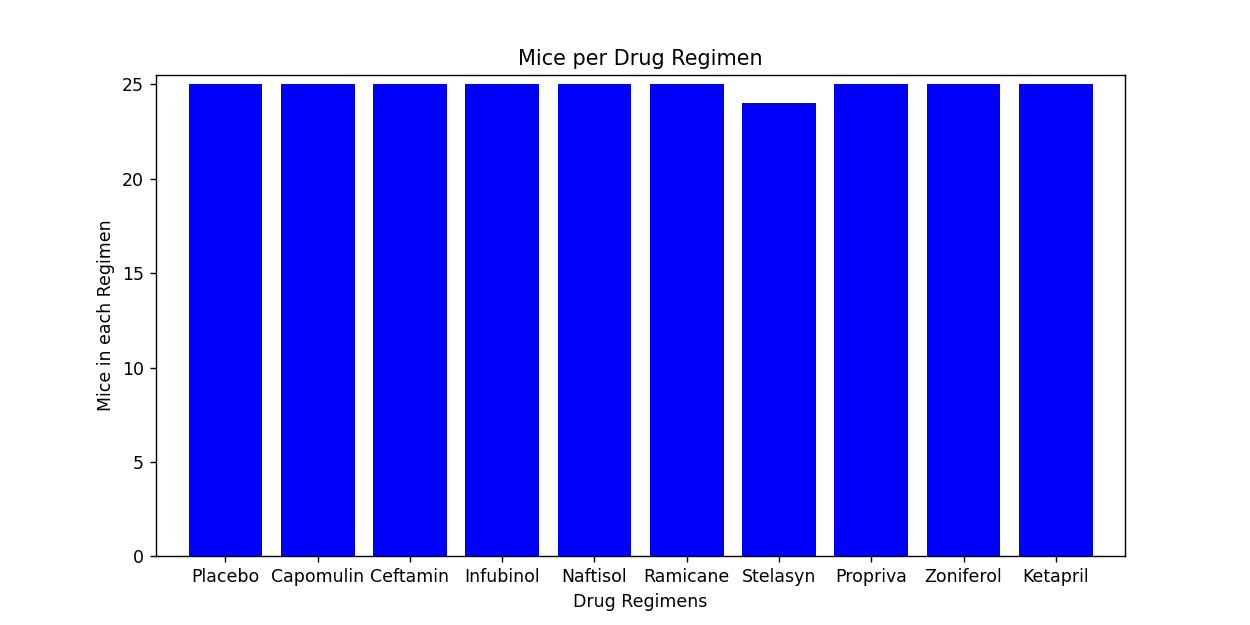

<BarContainer object of 10 artists>

In [30]:

plt.figure(figsize=(10,5))
plt.bar(x_axis, mice_in_trials, color="b", align="center")

In [31]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_regimens)

([<matplotlib.axis.XTick at 0x24812194d30>,
 [Text(-2.0, 0, 'Placebo'),
  Text(0.0, 0, 'Capomulin'),
  Text(2.0, 0, 'Ceftamin'),
  Text(4.0, 0, 'Infubinol'),
  Text(6.0, 0, 'Naftisol'),
  Text(8.0, 0, 'Ramicane'),
  Text(10.0, 0, 'Stelasyn'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Zoniferol'),
  Text(0, 0, 'Ketapril')])

In [32]:
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 9.75)

In [33]:

plt.ylim(0, max(mice_in_trials)+0.5)

(0.0, 25.5)

<IPython.core.display.Javascript object>


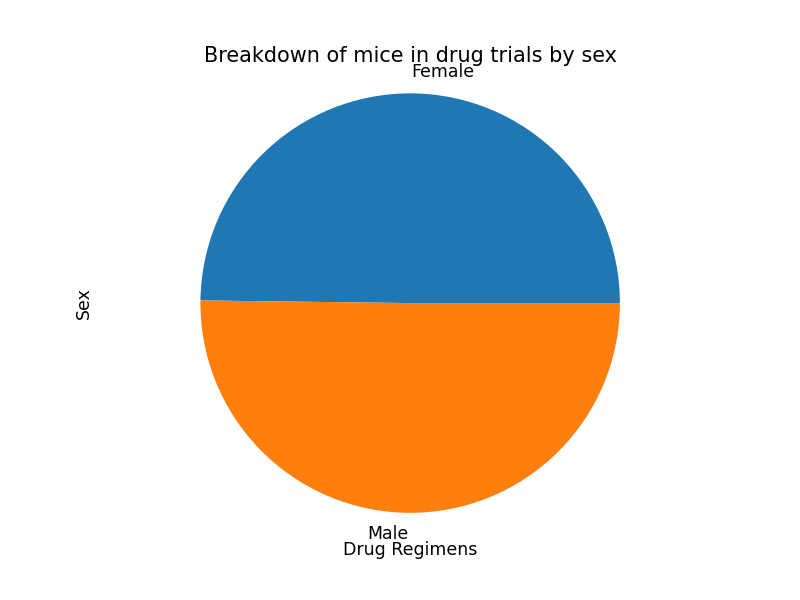

Text(0, 0.5, 'Mice in each Regimen')

In [35]:
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Mice in each Regimen")

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
RCT_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [37]:
pie=RCT_df.groupby(['Sex'])

piedata_df =pie["Sex"].count()
piedata_df.head()

Sex
Female    124
Male      125
Name: Sex, dtype: int64

In [38]:


piedata_df.plot(kind="pie", y='Sex', title=("Breakdown of mice in drug trials by sex"))

plt.show()
plt.axis("equal")

(-1.1016630746735625,
 1.1000791940320744,
 -1.1009347297692742,
 1.1017685314144794)

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_breakdown = ["Male", "Female"]
sex_count = [125, 124]

<IPython.core.display.Javascript object>


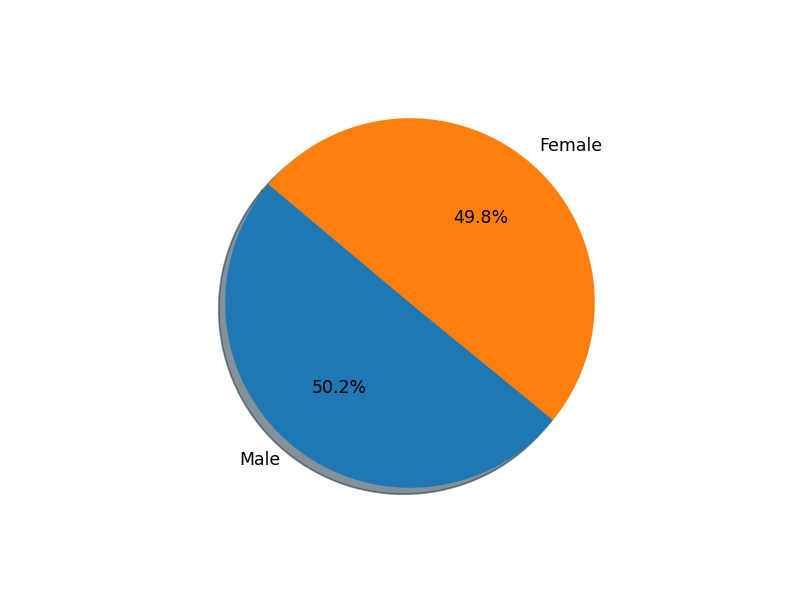

([<matplotlib.patches.Wedge at 0x24812ecc198>,
 [Text(-0.7017365844029831, -0.8470925369228767, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.3827654096743544, -0.4620504746852054, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

In [40]:
plt.pie(sex_count, labels=sex_breakdown,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

RCT_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [59]:
latest = pd.DataFrame(RCT_df.groupby(['Mouse ID'])[['Timepoint','Drug Regimen']].max()).reset_index()
#latest_df = RCT_df.groupby(['Mouse ID'])[['Timepoint'].max()
latest_df= latest
latest_df

,Mouse ID,Timepoint,Drug Regimen
0,a203,45,Infubinol
1,a251,45,Infubinol
2,a262,45,Placebo
3,a275,45,Ceftamin
4,a366,30,Stelasyn
...,...,...,...
244,z435,10,Propriva
245,z578,45,Ramicane
246,z581,45,Infubinol
247,z795,45,Naftisol


In [60]:
plot_df= pd.merge(RCT_df, latest_df, on ="Mouse ID", how = "left")
plot_df.head()

,Mouse ID,Drug Regimen_x,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y,Drug Regimen_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,45,Ramicane
1,s185,Capomulin,Female,3,17,45,23.343598,1,45,Capomulin
2,x401,Capomulin,Female,16,15,45,28.484033,0,45,Capomulin
3,m601,Capomulin,Male,22,17,45,28.430964,1,45,Capomulin
4,g791,Ramicane,Male,11,16,45,29.128472,1,45,Ramicane


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_list= ["Placebo", "Capomulin", "Ceftamin", "Infubinol", "Naftisol", "Ramicane", "Stelasyn", "Propriva", "Zoniferol", "Ketapril"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

#     print(f"{drug}'s potential outliers: {outliers}")

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and Scatter Plots

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = RCT_df[RCT_df["Drug Regimen"] == "Capomulin"]
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3


In [42]:
#Note: As there is no Mouse ID associaed with multiple timepoints, an average for each timepoint shall be used instead.
lines=Capomulin_df.groupby(['Timepoint'])

RM_df=lines.mean()
RM_df.head()

,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,
10,23.000000,23.000000,39.952347,0.00000
15,22.000000,25.000000,46.539206,0.00000
20,16.000000,17.000000,30.485985,0.00000
35,21.000000,21.000000,38.753265,1.00000
45,12.809524,19.857143,36.236114,1.47619


In [43]:
line = lines.mean()["Tumor Volume (mm3)"]
line2 = pd.DataFrame(line)
# line2.reset_index(inplace=True)
line2

,Tumor Volume (mm3)
Timepoint,
10,39.952347
15,46.539206
20,30.485985
35,38.753265
45,36.236114


<IPython.core.display.Javascript object>


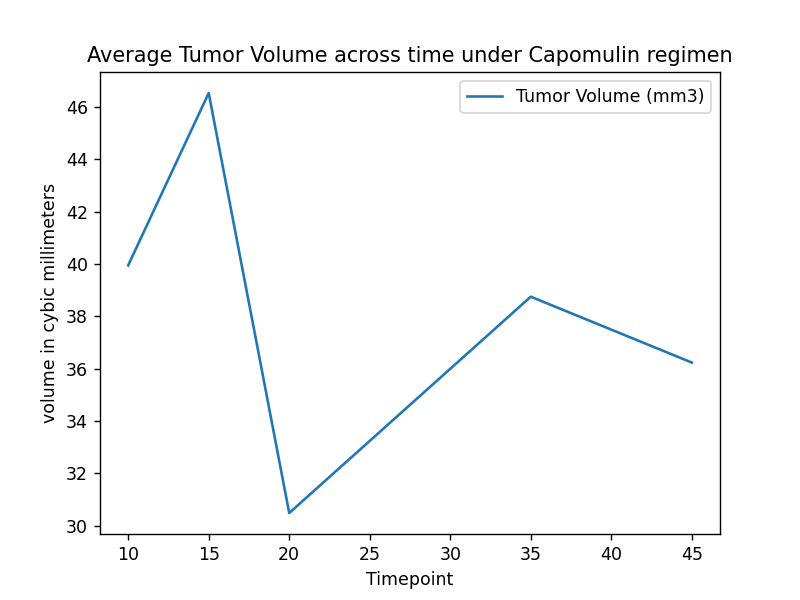

In [44]:

line2.plot()

In [45]:
plt.title("Average Tumor Volume across time under Capomulin regimen")

plt.ylabel("volume in cybic millimeters")

Text(58.902777777777786, 0.5, 'volume in cybic millimeters')

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3
12,y793,Capomulin,Male,17,17,45,31.896238,2
13,r554,Capomulin,Female,8,17,45,32.377357,3
14,m957,Capomulin,Female,3,19,45,33.329098,1
16,t565,Capomulin,Female,20,17,45,34.455298,0
20,i738,Capomulin,Female,23,20,45,37.311846,2


<IPython.core.display.Javascript object>


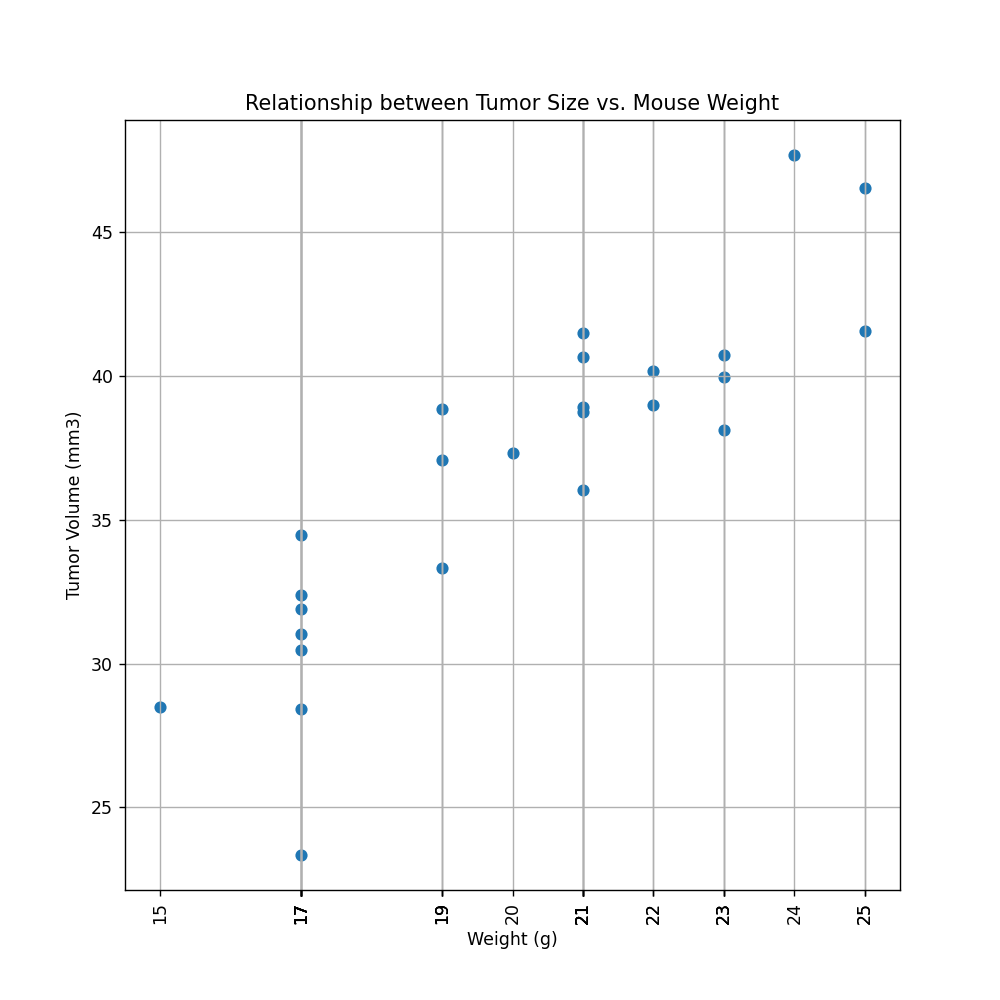

In [48]:
Capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Relationship between Tumor Size vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,weight
1,s185,Capomulin,Female,3,17,45,23.343598,1,17
2,x401,Capomulin,Female,16,15,45,28.484033,0,15
3,m601,Capomulin,Male,22,17,45,28.430964,1,17
6,f966,Capomulin,Male,16,17,20,30.485985,0,17
10,u364,Capomulin,Male,18,17,45,31.023923,3,17
12,y793,Capomulin,Male,17,17,45,31.896238,2,17
13,r554,Capomulin,Female,8,17,45,32.377357,3,17
14,m957,Capomulin,Female,3,19,45,33.329098,1,19
16,t565,Capomulin,Female,20,17,45,34.455298,0,17
20,i738,Capomulin,Female,23,20,45,37.311846,2,20


In [50]:
weight = Capomulin_df.iloc[:,4]
tumor_volume = Capomulin_df.iloc[:,6]
plt.scatter(weight,tumor_volume)
plt.xticks(weight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

<IPython.core.display.Javascript object>


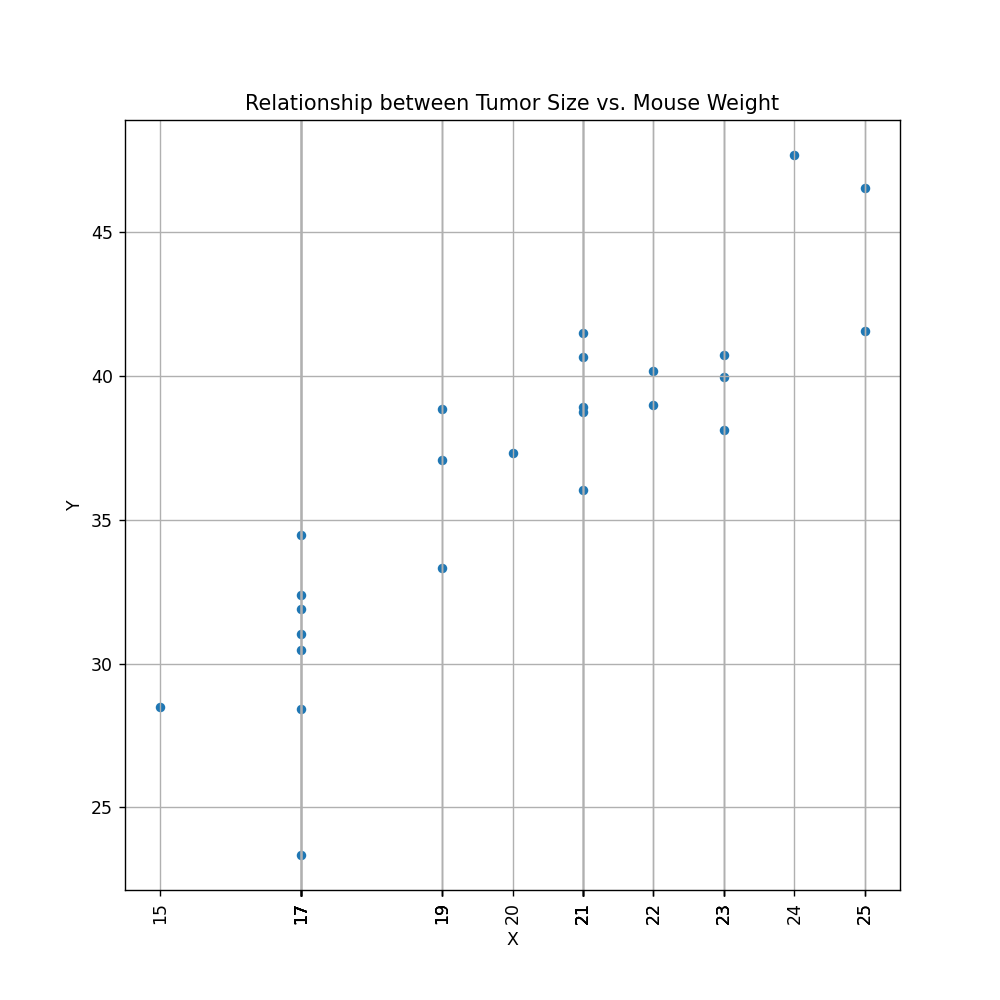

In [51]:
Capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Relationship between Tumor Size vs. Mouse Weight")
plt.show()

In [61]:
from scipy import stats
from sklearn.linear_model import LinearRegression

In [66]:
X = Capomulin_df.iloc[:, 4].values.reshape(-1, 1)
Y = Capomulin_df.iloc[:, 6].values.reshape(-1, 1)

In [71]:
plt.xticks(X, rotation=90)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [84]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)


ValueError: too many values to unpack (expected 4)

In [69]:
vc_fit = slope * (Capomulin_df[X) + vc_int